In [1]:
%load_ext autoreload
%autoreload 2

%cd '..'

/dss/dsshome1/03/di93fup/polarization_reddit


In [2]:
import json

import networkx as nx
import matplotlib.pyplot as plt

from load.utils import load_network, load_subreddits
from network.utils import filter_node, draw_network
from preprocessing.constants import METADATA_DIR
from eda.constants import FIGURES_DIR


In [3]:
YEAR = 2008


In [4]:
subreddits = load_subreddits()

dem_subreddits = set(subreddits[subreddits["party"] == "dem"]["subreddit"])
rep_subreddits = set(subreddits[subreddits["party"] == "rep"]["subreddit"])


### Weighted

In [ ]:
network_weighted = load_network(year=YEAR, weighted=True)
all_subreddits_year = set(network_weighted.nodes())

dem_subreddits_year =  dem_subreddits & all_subreddits_year
rep_subreddits_year = rep_subreddits & all_subreddits_year

print(len(dem_subreddits_year), len(rep_subreddits_year))


In [6]:
dem_network_weighted = nx.subgraph_view(
    network_weighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_weighted,
        party_subreddits=dem_subreddits_year,
        opposition_subreddits=rep_subreddits_year,
        weighted=True,
    ),
)

rep_network_weighted = nx.subgraph_view(
    network_weighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_weighted,
        party_subreddits=rep_subreddits_year,
        opposition_subreddits=dem_subreddits_year,
        weighted=True,
    ),
)


In [7]:
dem_subreddits_weighted = set(dem_network_weighted.nodes())

print("Democrat labeled subreddits", dem_subreddits_year)

print(
    "Democrat discovered subreddits",
    dem_subreddits_weighted - dem_subreddits_year,
)

print("Total", len(dem_subreddits_weighted))

with open(f"{METADATA_DIR}/dem_subreddits_{YEAR}_weighted.json", "w", encoding="utf-8") as f:
    json.dump(list(dem_subreddits_weighted), f)

Democrat labeled subreddits {'obama'}
Democrat discovered subreddits {'Economics', 'politics'}
Total 3


In [8]:
rep_subreddits_weighted = set(rep_network_weighted.nodes())

print("Republican labeled subreddits", rep_subreddits_year)

print(
    "Republican discovered subreddits",
    rep_subreddits_weighted - rep_subreddits_year,
)

print("Total", len(rep_subreddits_weighted))

with open(f"{METADATA_DIR}/rep_subreddits_{YEAR}_weighted.json", "w", encoding="utf-8") as f:
    json.dump(list(rep_subreddits_weighted), f)

Republican labeled subreddits set()
Republican discovered subreddits set()
Total 0


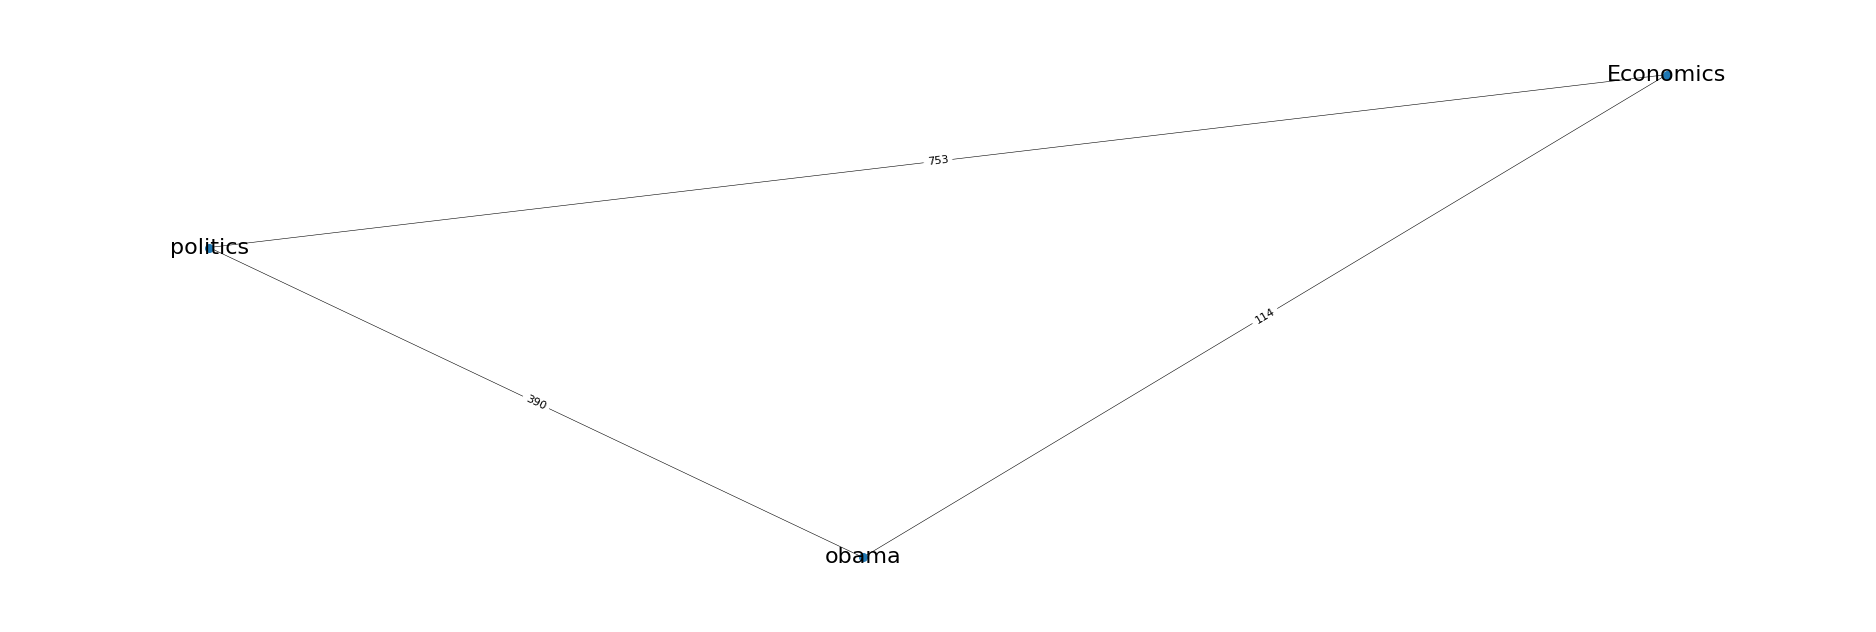

In [9]:

plt.figure(figsize=(30,10), dpi=80)

draw_network(
    dem_network_weighted,
    weighted=True,
    year=YEAR,
)

plt.savefig(
    f"{FIGURES_DIR}/dem_network_{YEAR}_weighted.pdf"
)

plt.show()


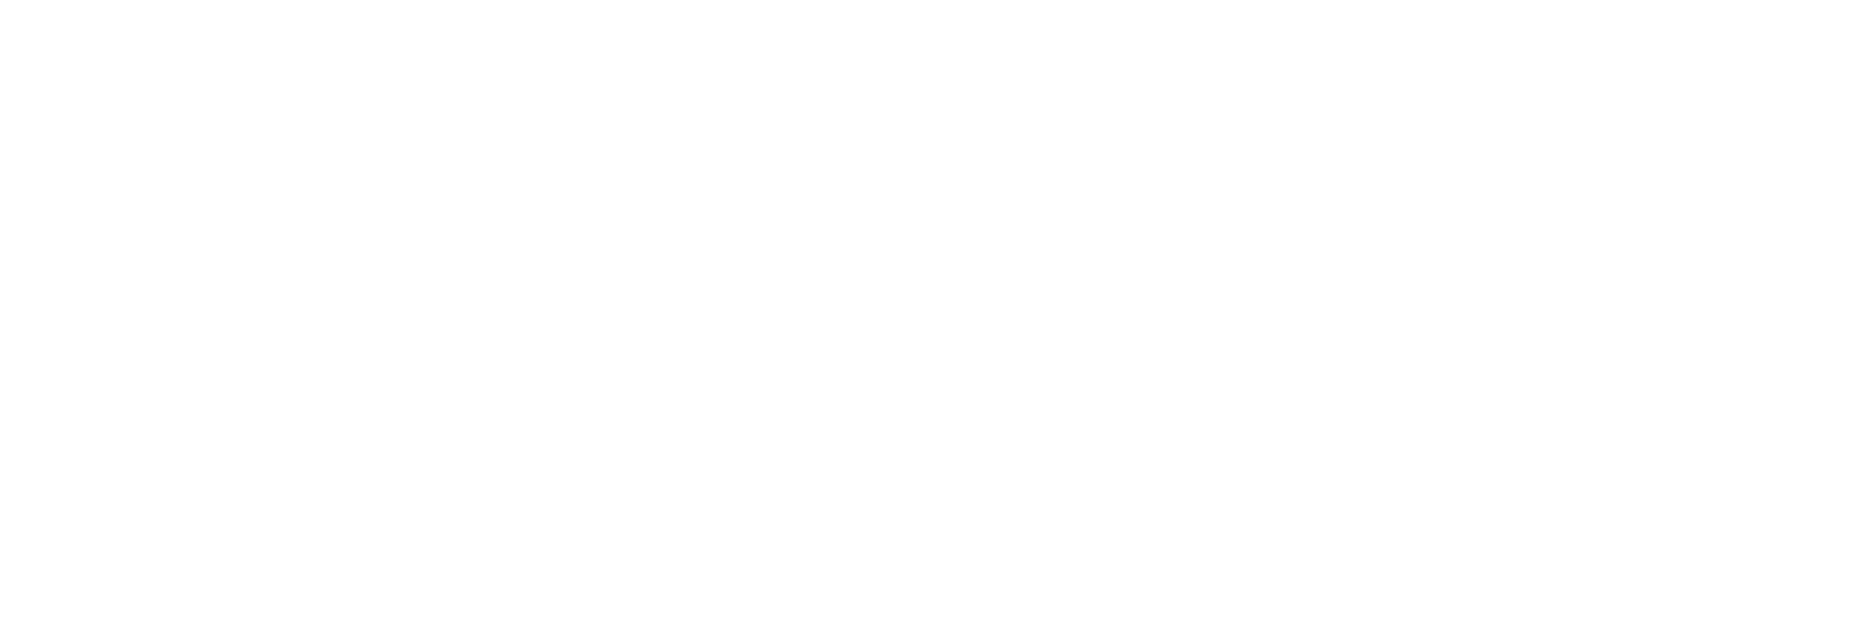

In [10]:
plt.figure(figsize=(30,10), dpi=80)

draw_network(
    rep_network_weighted,
    weighted=True,
    year=YEAR,
)

plt.savefig(
    f"{FIGURES_DIR}/rep_network_{YEAR}_weighted.pdf"
)

plt.show()

### Unweighted

In [11]:
network_unweighted = load_network(year=YEAR, weighted=False)

dem_network_unweighted = nx.subgraph_view(
    network_unweighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_unweighted,
        party_subreddits=dem_subreddits_year,
        opposition_subreddits=rep_subreddits_year,
        weighted=False,
    ),
)

rep_network_unweighted = nx.subgraph_view(
    network_unweighted,
    filter_node=lambda node: filter_node(
        node,
        network=network_unweighted,
        party_subreddits=rep_subreddits_year,
        opposition_subreddits=dem_subreddits_year,
        weighted=False,
    ),
)


In [12]:
dem_subreddits_unweighted = set(dem_network_unweighted.nodes())

print("Democrat labeled subreddits", dem_subreddits_year)

print(
    "Democrat discovered subreddits",
    dem_subreddits_unweighted - dem_subreddits_year,
)

print("Total", len(dem_subreddits_unweighted))

with open(f"{METADATA_DIR}/dem_subreddits_{YEAR}_unweighted.json", "w", encoding="utf-8") as f:
    json.dump(list(dem_subreddits_unweighted), f)


Democrat labeled subreddits {'obama'}
Democrat discovered subreddits {'politics'}
Total 2


In [13]:
rep_subreddits_unweighted = set(rep_network_unweighted.nodes())

print("Republican labeled subreddits", rep_subreddits_year)

print(
    "Republican discovered subreddits",
    rep_subreddits_unweighted - rep_subreddits_year,
)

print("Total", len(rep_subreddits_unweighted))

with open(f"{METADATA_DIR}/rep_subreddits_{YEAR}_unweighted.json", "w", encoding="utf-8") as f:
    json.dump(list(rep_subreddits_unweighted), f)


Republican labeled subreddits set()
Republican discovered subreddits set()
Total 0


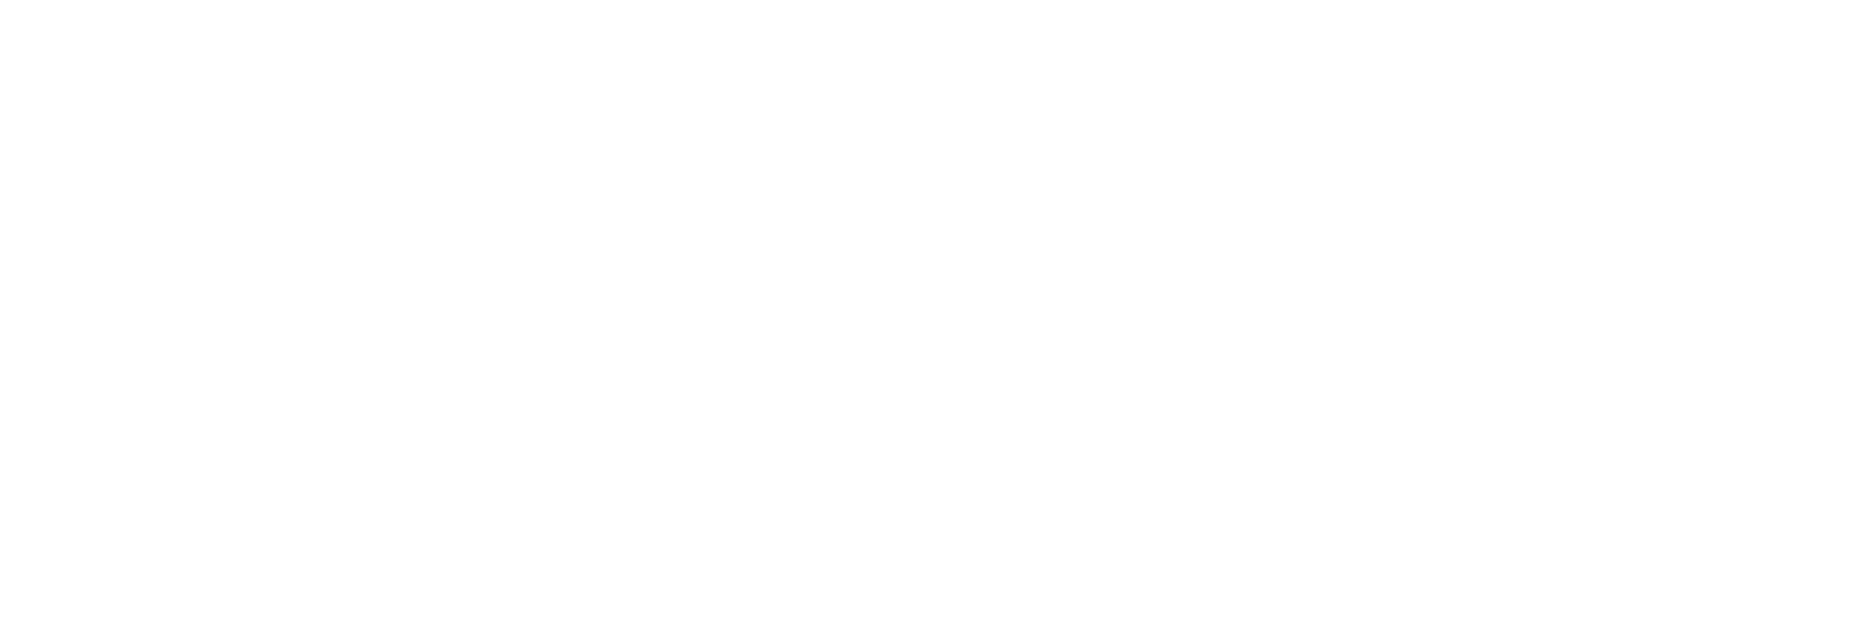

In [14]:
plt.figure(figsize=(30,10), dpi=80)

draw_network(
    rep_network_unweighted,
    weighted=False,
    year=YEAR,
)

plt.savefig(
    f"{FIGURES_DIR}/rep_network_{YEAR}_unweighted.pdf"
)

plt.show()


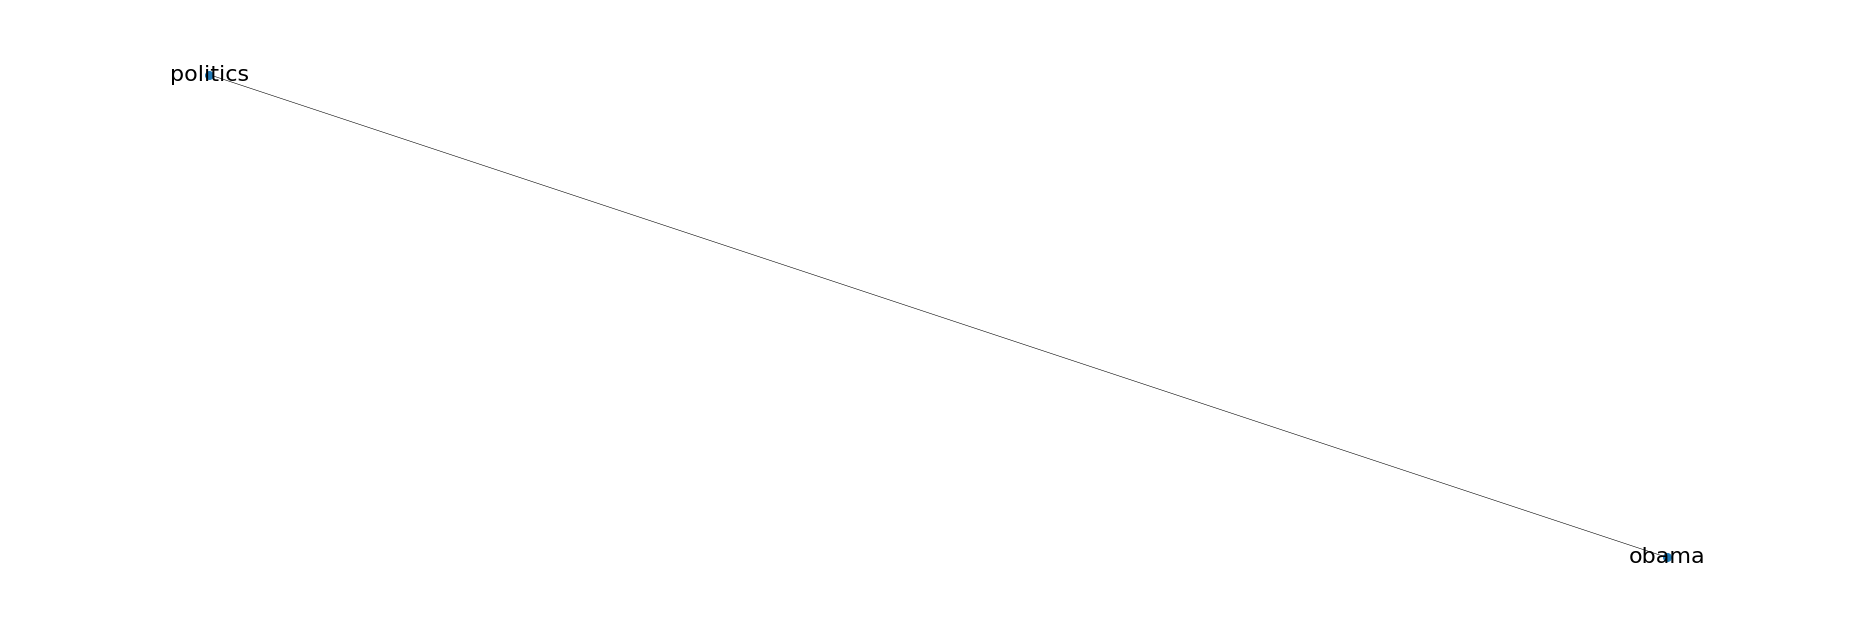

In [15]:
plt.figure(figsize=(30,10), dpi=80)

draw_network(
    dem_network_unweighted,
    weighted=False,
    year=YEAR,
)

plt.savefig(
    f"{FIGURES_DIR}/dem_network_{YEAR}_weighted.pdf"
)

plt.show()
